<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


In [325]:
# data modules
import scipy.stats as stats
import pandas as pd
import numpy as np

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score, train_test_split

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

DATA DESCRIPTION:
Property tax data including location of property, value of property, the unique property identifier, and specific property characteristics

In [287]:
tax1415 = pd.read_csv('~/Desktop/DSI-SF-5-Working/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2014_2015.csv')

In [288]:
tax1415.head()

,PROPLOC,RP1NBRCDE,RP1PRCLID,BASELOT,BASELOTSFX,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,0000 0000 0000,08H,0001 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0
1,0000 0000 0000,08H,0002 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0
2,0000 0000 0000,08H,0004 002,0,NaN,1,VCI,0,0,0,...,NaN,N,0,0,14,0,0,0,0,0
3,0000 0000 0000,08H,0005 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0
4,0000 0000 0000,08H,0006 001,0,NaN,1,G,1900,0,0,...,NaN,N,0,0,14,0,0,0,0,0


In [289]:
tax1415.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206816 entries, 0 to 206815
Data columns (total 41 columns):
PROPLOC       206816 non-null object
RP1NBRCDE     206731 non-null object
RP1PRCLID     206816 non-null object
BASELOT       206816 non-null int64
BASELOTSFX    45 non-null object
RP1VOLUME     206816 non-null int64
RP1CLACDE     206465 non-null object
YRBLT         206816 non-null int64
BATHS         206816 non-null int64
BEDS          206816 non-null int64
ROOMS         206816 non-null int64
STOREYNO      206816 non-null int64
UNITS         206816 non-null int64
CHGDATE       206816 non-null int64
REMARKFLA     2111 non-null object
KITCHEN       28035 non-null object
BUILTIN       206816 non-null int64
ZONE          174762 non-null object
CONSTTYPE     169753 non-null object
DEPTH         206816 non-null float64
FRONT         206816 non-null float64
SQFT          206816 non-null int64
FBA           206816 non-null int64
LAREA         206816 non-null float64
LOTCODE       715

In [290]:
#check counts of missing values in each column
tax1415.isnull().sum(axis=0)

PROPLOC            0
RP1NBRCDE         85
RP1PRCLID          0
BASELOT            0
BASELOTSFX    206771
RP1VOLUME          0
RP1CLACDE        351
YRBLT              0
BATHS              0
BEDS               0
ROOMS              0
STOREYNO           0
UNITS              0
CHGDATE            0
REMARKFLA     204705
KITCHEN       178781
BUILTIN            0
ZONE           32054
CONSTTYPE      37063
DEPTH              0
FRONT              0
SQFT               0
FBA                0
LAREA              0
LOTCODE       135262
REPRISDATE    206816
RP1RECDAT1         0
RP1DOCNO1     111976
RP1DOCNO2          0
RP1TRACDE        578
OWNRPRCNT          0
EXEMPTYPE     113620
RP1STACDE     203172
RP1EXMVL2          0
RP1EXMVL1          0
ROLLYEAR           0
RECURRSALD         0
RP1FXTVAL          0
RP1IMPVAL          0
RP1LNDVAL          0
RP1PPTVAL          0
dtype: int64

In [292]:
#restrict the dataset to potentially useful columns (only columns with non-missing values)
tax1415 = tax1415[['YRBLT','BATHS','BEDS','ROOMS','STOREYNO','UNITS','SQFT','LAREA','DEPTH','FRONT','FBA',
                   'RP1FXTVAL','RP1IMPVAL','RP1LNDVAL','RP1PPTVAL']]

In [293]:
#summarize those columns
tax1415.describe().T

,count,mean,std,min,25%,50%,75%,max
YRBLT,206816.0,1790.422158,5.236544e+02,0.0,1909.0,1929.0,1959.00,8.687000e+03
BATHS,206816.0,2.370532,8.713152e+00,0.0,1.0,2.0,2.00,1.002000e+03
BEDS,206816.0,1.139588,1.104756e+01,0.0,0.0,0.0,2.00,3.800000e+03
ROOMS,206816.0,7.770187,2.346211e+01,-7.0,4.0,6.0,8.00,3.606000e+03
STOREYNO,206816.0,1.514733,7.858380e+00,-1.0,1.0,1.0,2.00,9.990000e+02
UNITS,206816.0,1.805760,1.517087e+01,0.0,1.0,1.0,1.00,4.000000e+03
SQFT,206816.0,2898.101689,1.827787e+04,0.0,1000.0,1416.0,2237.00,3.015837e+06
LAREA,206816.0,3803.400131,1.353616e+05,0.0,0.0,2495.0,3000.00,5.800145e+07
DEPTH,206816.0,8.562466,2.168554e+01,0.0,0.0,0.0,0.00,9.996000e+01
FRONT,206816.0,0.065071,1.710447e+00,0.0,0.0,0.0,0.00,9.939000e+01


In [294]:
#drop columns with 0s in the 75th percentile
tax1415.drop(['DEPTH','FRONT','FBA','RP1FXTVAL','RP1PPTVAL'], axis=1, inplace=True)

In [295]:
#check year values in the dataset
tax1415.YRBLT.value_counts()

0       16129
1900    14709
1925     5503
1907     4867
1908     4797
1924     4776
1926     4345
1941     4231
1923     4198
1927     4051
1906     3978
1940     3972
1912     3099
1910     3091
1922     3070
1947     2911
1948     2904
1939     2864
1928     2796
1950     2258
1909     2198
1938     2175
1946     2174
2004     2137
2008     2073
1951     2021
2002     2010
1929     1985
1911     1982
1914     1920
        ...  
1877        1
660         1
5953        1
4289        1
41          1
6573        1
942         1
2087        1
692         1
7988        1
931         1
849         1
2104        1
1849        1
4893        1
1438        1
5688        1
1594        1
1851        1
3900        1
24          1
5203        1
4885        1
22          1
2404        1
21          1
6886        1
1791        1
3987        1
208         1
Name: YRBLT, dtype: int64

In [297]:
#filter out rows where YRBLT values are outside the 1901-2017 period (1900 is removed because it seems to be misreported)
tax1415 = tax1415[tax1415.apply(lambda x: (x['YRBLT'] >= 1901) & (x['YRBLT'] <= 2017), axis=1)]

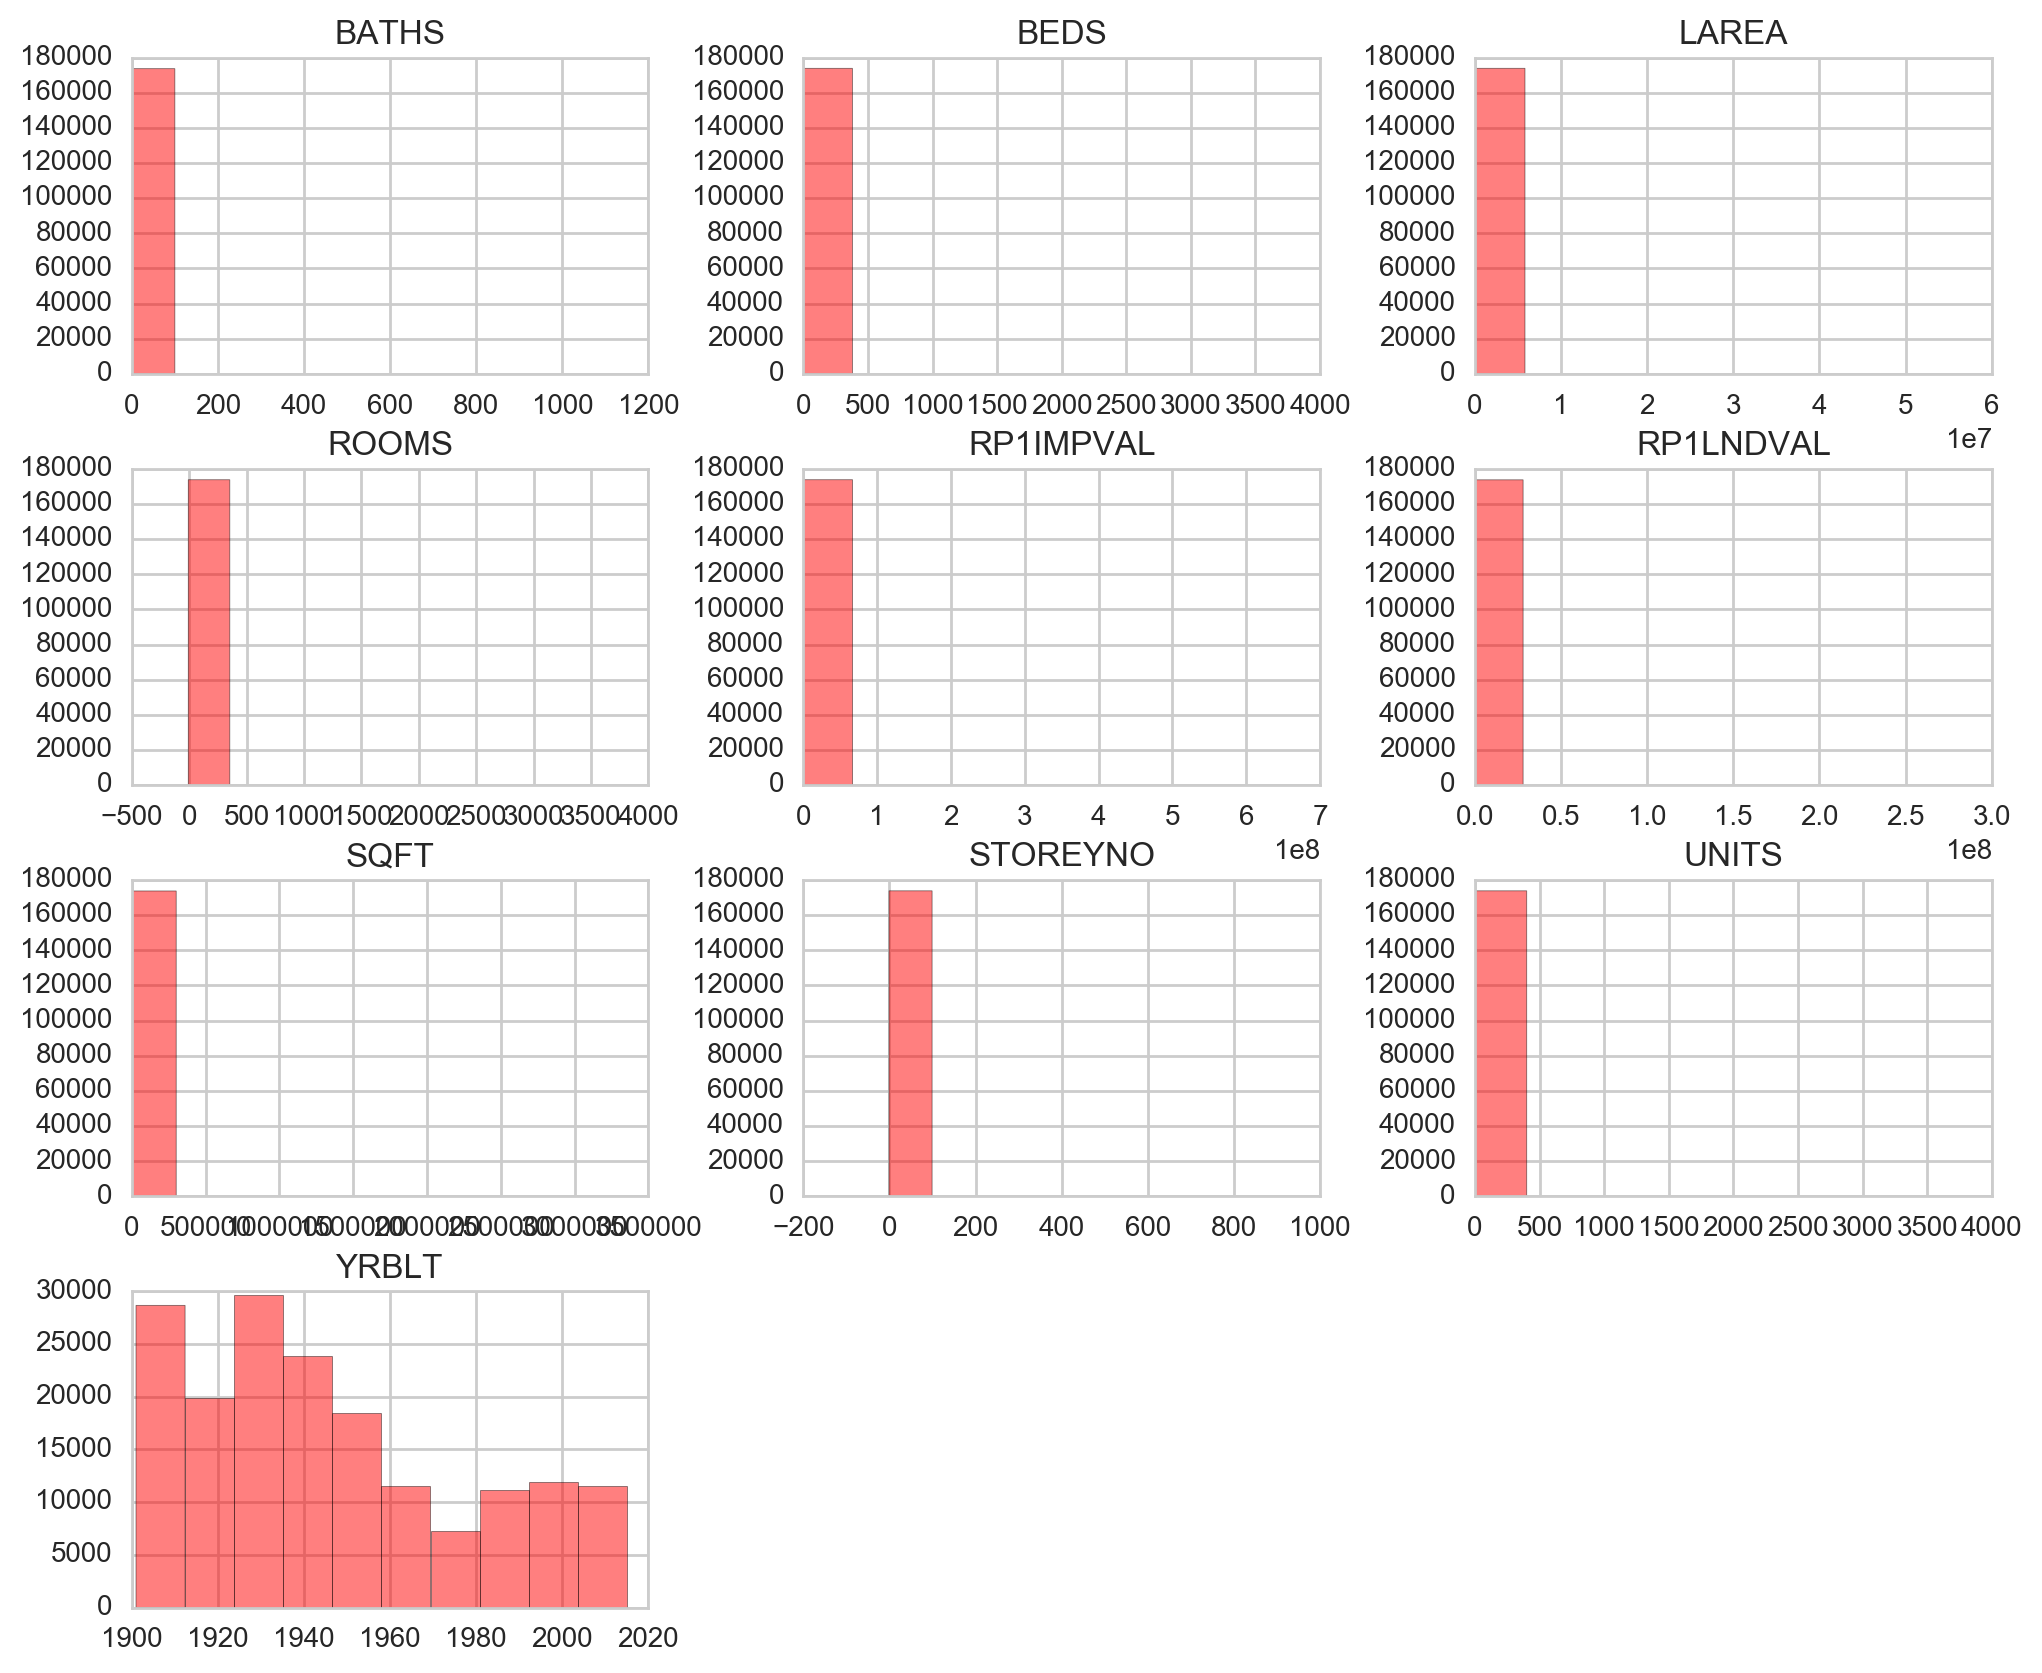

In [298]:
#plot histograms of all columns
tax1415.hist(figsize = (12,10), alpha=0.5, color='red');

In [299]:
#check UNITS values
tax1415.UNITS.value_counts().nlargest(10)

1     116757
0      26335
2      13578
3       5014
4       3517
6       2191
5       1169
12       857
8        555
7        554
Name: UNITS, dtype: int64

In [306]:
#restrict to single-unit single- or two-story property
single_unit = (tax1415.UNITS == 1)
one_two_story = (tax1415.STOREYNO == 1) | (tax1415.STOREYNO == 2)
tax1415 = tax1415[single_unit & one_two_story]

In [307]:
tax1415.STOREYNO.value_counts()

1    76807
2    22817
Name: STOREYNO, dtype: int64

In [309]:
#remove rows where square footage is more than 2 standard deviations away from the mean
tax1415 = tax1415[np.abs(tax1415['SQFT'] - tax1415['SQFT'].mean()) <= (2*tax1415['SQFT'].std())]

In [311]:
#remove rows where number of rooms is more than 2 standard deviations away from the mean
tax1415 = tax1415[np.abs(tax1415['ROOMS'] - tax1415['ROOMS'].mean()) <= (2*tax1415['ROOMS'].std())]

In [313]:
#remove rows where number of bathrooms is more than 2 standard deviations away from the mean
tax1415 = tax1415[np.abs(tax1415['BATHS'] - tax1415['BATHS'].mean()) <= (2*tax1415['BATHS'].std())]

In [315]:
#remove rows where number of bedrooms is more than 2 standard deviations away from the mean
tax1415 = tax1415[np.abs(tax1415['BEDS'] - tax1415['BEDS'].mean()) <= (2*tax1415['BEDS'].std())]

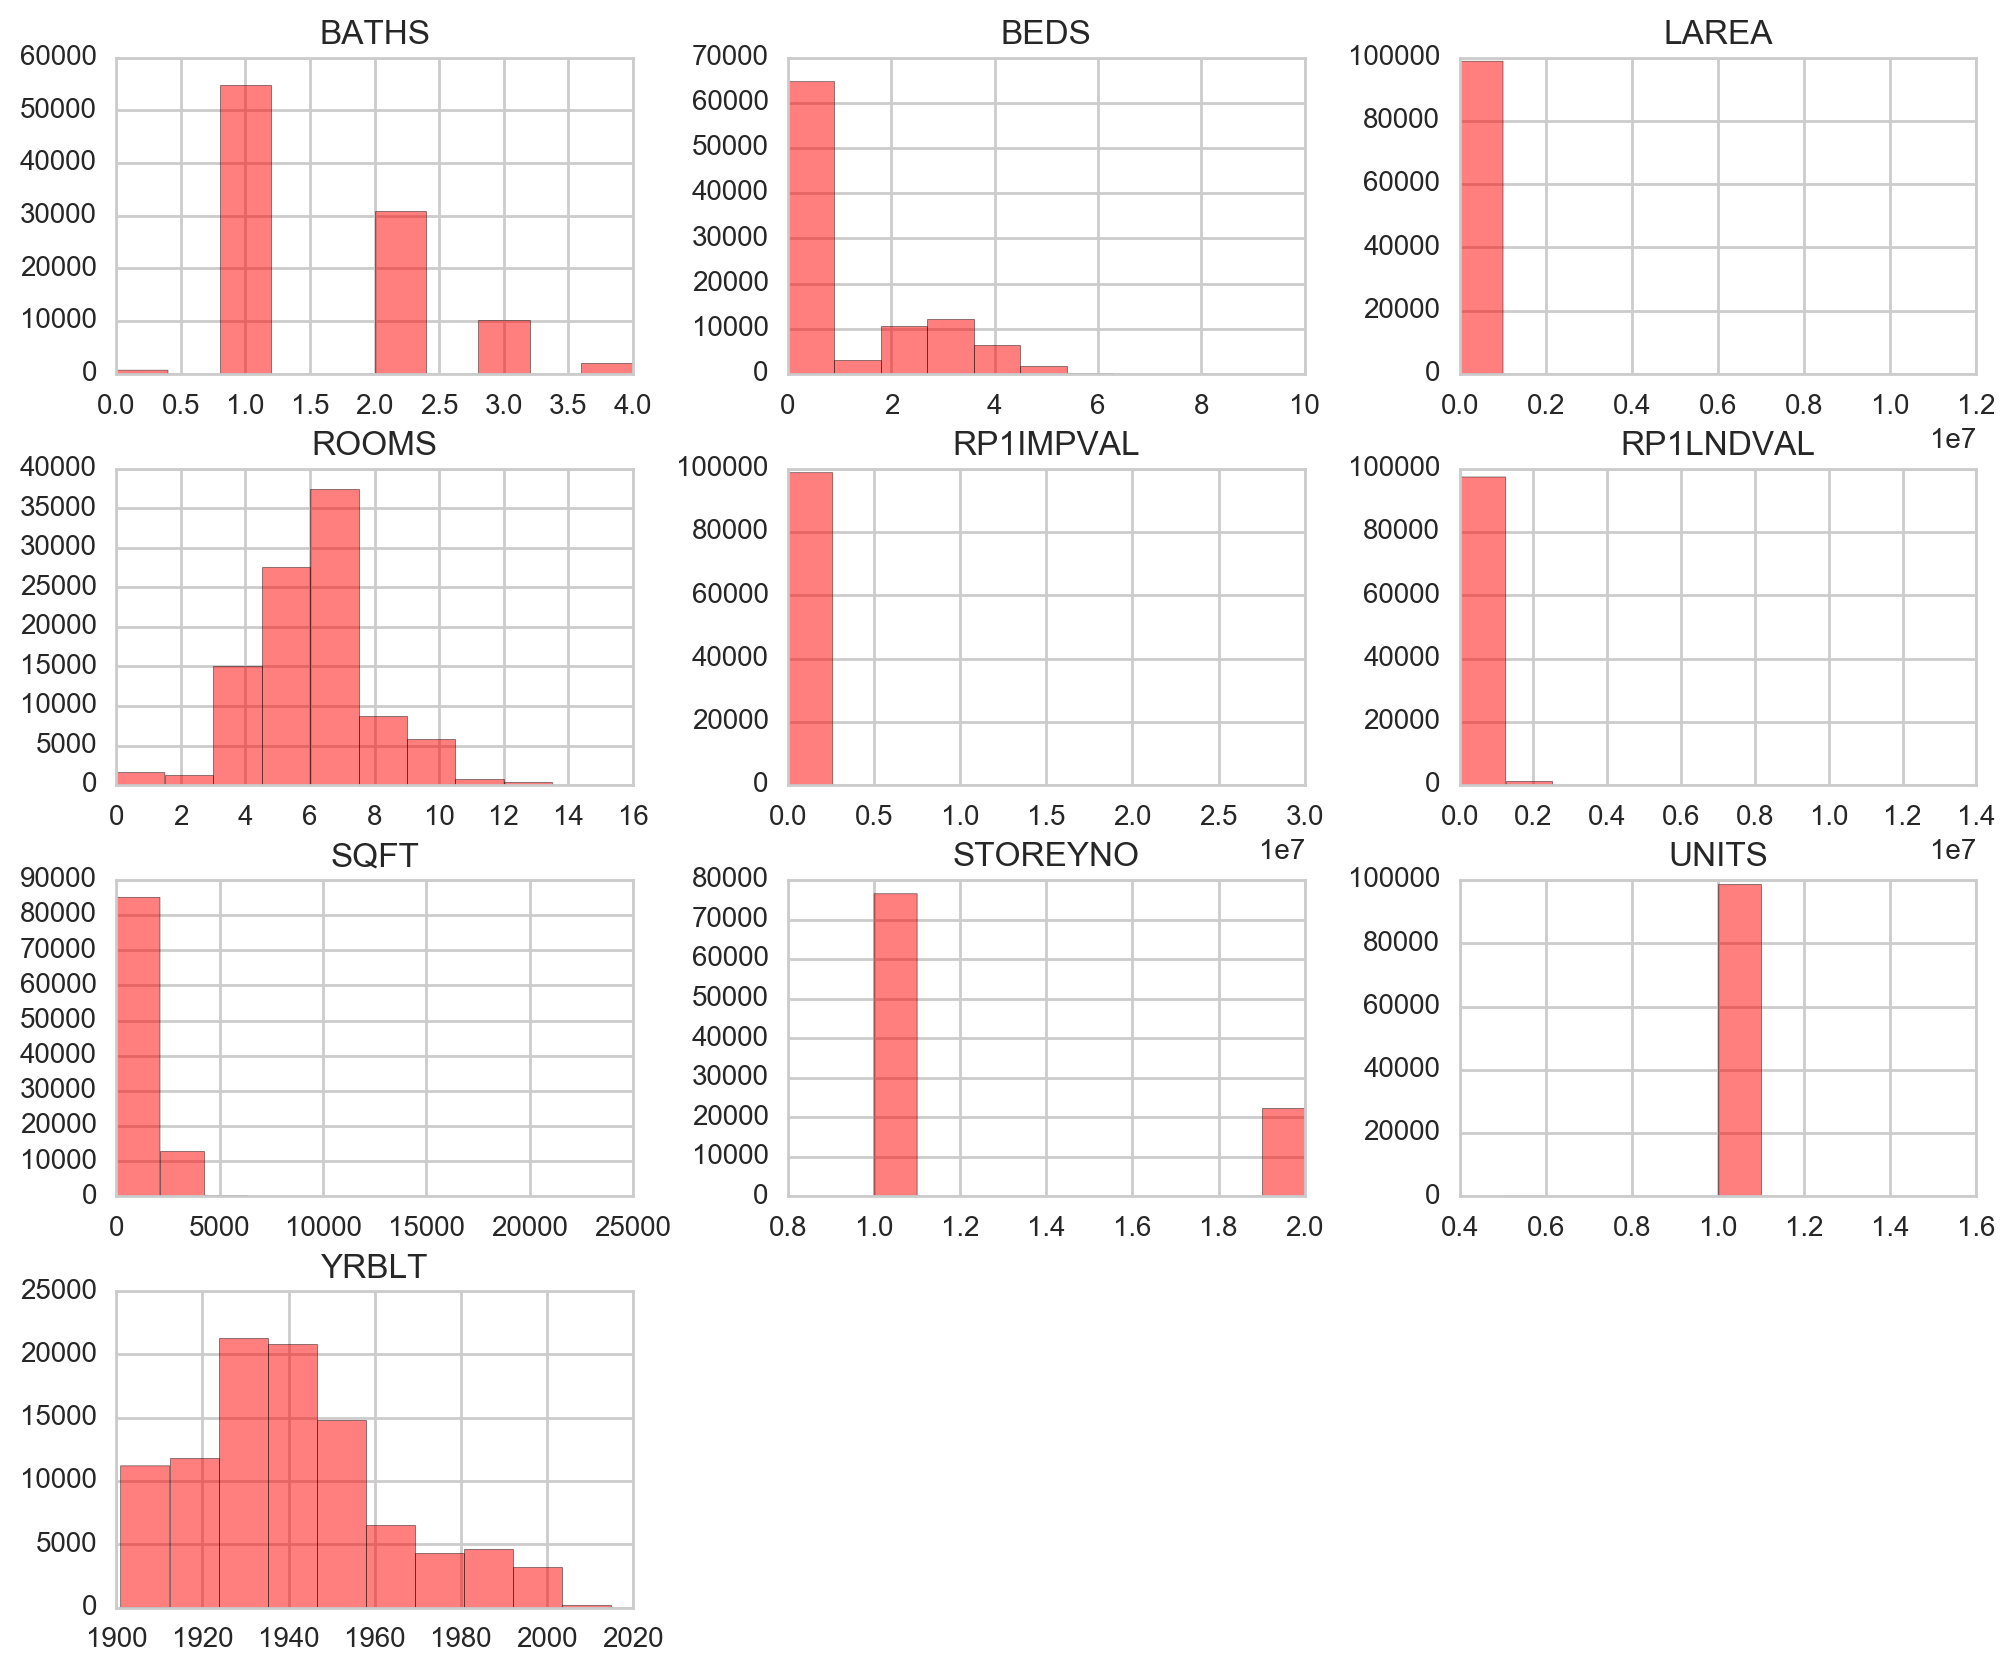

In [316]:
#re-plot histograms of all columns
tax1415.hist(figsize = (12,10), alpha=0.5, color='red');

In [317]:
#restrict to columns to be used for later analysis
tax1415.drop(['LAREA','RP1IMPVAL','RP1LNDVAL','UNITS','STOREYNO'], axis=1, inplace=True)

In [318]:
tax1415.head()

,YRBLT,BATHS,BEDS,ROOMS,SQFT
12,1948,2,0,5,6800
13,1993,0,0,0,6100
17,1937,4,0,11,15397
22,1968,4,0,12,6776
23,1968,3,0,9,8954


HYPOTHESIS:
Year that a property was built can be predicted by counts of bathrooms, bedrooms, total number of rooms and square footage

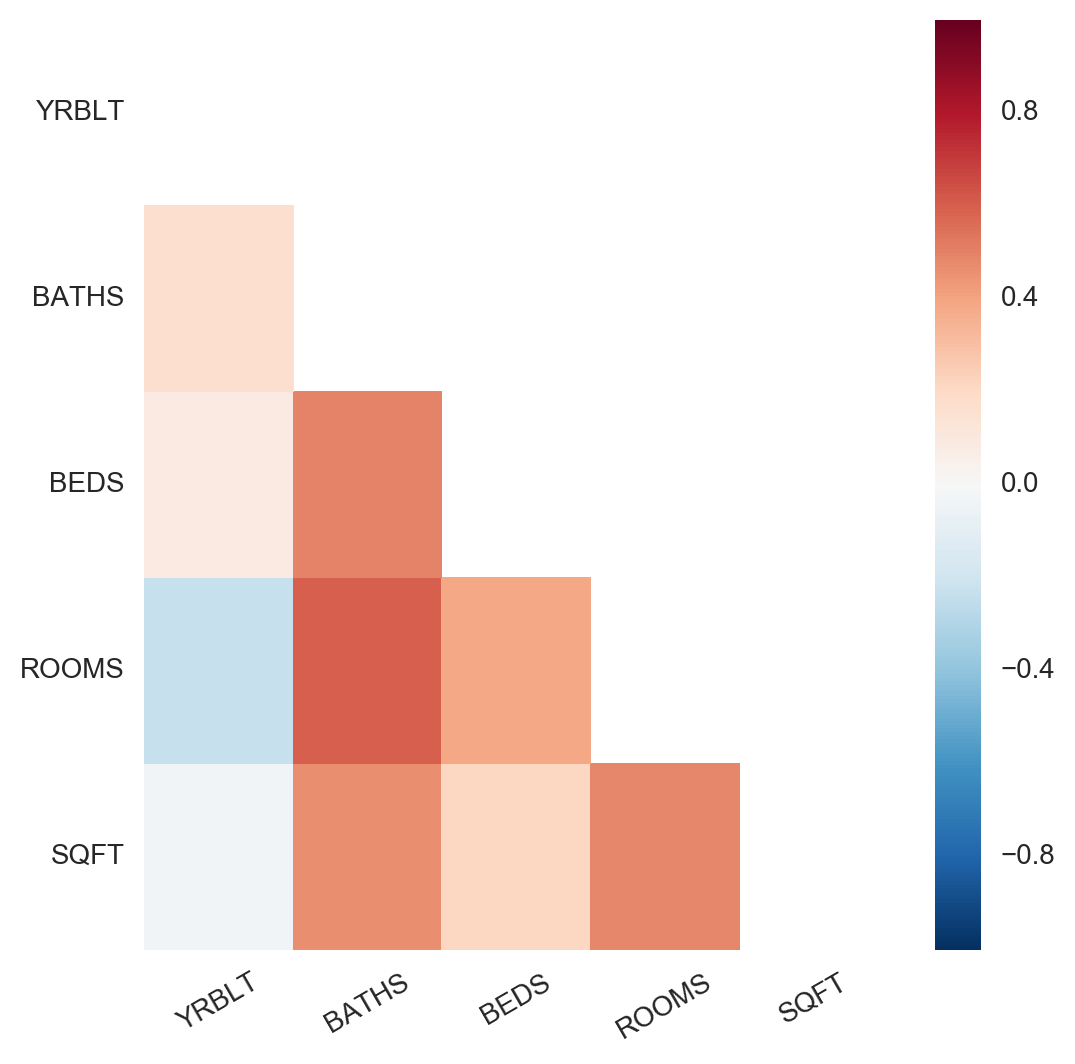

In [321]:
corrs = tax1415.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(6,6))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show();

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [323]:
#SEE ABOVE FOR OUTLIER HANDLING

x_cols = tax1415.drop('YRBLT', axis=1)

Y = tax1415.YRBLT.values
X = x_cols.values

In [327]:
#BASIC LINEAR REGRESSION (WITHOUT TRAIN-TEST SPLIT)

lr = LinearRegression()

model = lr.fit(X, Y)

score_r2 = model.score(X, Y)
score_r2

0.19964950047141594

In [326]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
print X_train.shape
print X.shape

(79058, 4)
(98823, 4)


In [328]:
#LINEAR REGRESSION WITH TRAIN-TEST SPLIT

lr.fit(X_train,Y_train)
Y_hat = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_hat)
R_2 = lr.score(X_train,Y_train)
R_2

0.1995391976016534

In [331]:
#LINEAR REGRESSION WITH K-FOLD CROSS-VALIDATION

linreg_scores = cross_val_score(lr, X, Y, cv=10, scoring='r2')

print linreg_scores
print np.mean(linreg_scores)

[ 0.18553143 -0.15155714 -0.12946826 -0.0906184   0.06630217  0.27611522
  0.12783261  0.05499852  0.03093083 -0.01127097]
0.0358796003665


DIFFERENCES IN R^2: The lower R^2 in the cross-validated model tells us that there is overfitting in that model relative to the baseline model fit on the test set.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

If R^2 is negative it means that the model is performing worse than just predicting response variable values based on its mean.  It can only be negative when the model is tested on the new data because by definition the formula for R^2 is 1 - RSS/Total Variance and RSS and Total Variance are positive and RSS cannot be larger than Total Variance.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


Fire Incidents includes a summary of each (non-medical) incident to which the SF Fire Department responded. Each incident record includes the call number, incident number, address, number and type of each unit responding, call type (as determined by dispatch), prime situation (field observation), actions taken, and property loss.

In [384]:
fire = pd.read_csv('~/Desktop/DSI-SF-5-Working/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv')
crime = pd.read_csv('~/Desktop/DSI-SF-5-Working/datasets/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv')

In [385]:
fire.shape

(406736, 63)

In [386]:
fire.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"
3,13033326,0,2799 Pacific Av,04/09/2013,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,04/09/2013 05:20:27 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11101416,0,Polk St. / Pine St.,11/01/2011,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,11/01/2011 06:11:09 PM,SF,94109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7896190000297, -122.420497)"


In [387]:
fire.isnull().sum(axis=0)

Incident Number                                      0
Exposure Number                                      0
Address                                            103
Incident Date                                        0
Call Number                                          0
Alarm DtTm                                           0
Arrival DtTm                                        18
Close DtTm                                           0
City                                              1227
Zipcode                                          72387
Battalion                                            0
Station Area                                       529
Box                                             297821
Suppression Units                                    0
Suppression Personnel                                0
EMS Units                                            0
EMS Personnel                                        0
Other Units                                          0
Other Pers

In [388]:
fire = fire[['Incident Date','City','Suppression Units','EMS Units','Other Units','Neighborhood  District']]

In [389]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406736 entries, 0 to 406735
Data columns (total 6 columns):
Incident Date             406736 non-null object
City                      405509 non-null object
Suppression Units         406736 non-null int64
EMS Units                 406736 non-null int64
Other Units               406736 non-null int64
Neighborhood  District    334230 non-null object
dtypes: int64(3), object(3)
memory usage: 18.6+ MB


In [390]:
fire["Neighborhood  District"].value_counts()

Tenderloin                        34630
Financial District/South Beach    31733
Mission                           31493
South of Market                   28886
Western Addition                  15269
Bayview Hunters Point             14029
Nob Hill                          13167
Pacific Heights                   10036
Chinatown                          9594
Hayes Valley                       9372
Castro/Upper Market                9217
Marina                             8799
Sunset/Parkside                    8706
North Beach                        7857
Potrero Hill                       7322
Russian Hill                       6685
Bernal Heights                     6300
Outer Richmond                     5886
Lakeshore                          5871
West of Twin Peaks                 5741
Haight Ashbury                     5625
Excelsior                          5111
Inner Sunset                       4986
Outer Mission                      4879
Mission Bay                        4811


In [391]:
#convert Incident Date column to datetime type
fire['Incident Date'] = pd.to_datetime(pd.Series(fire['Incident Date']), format="%m/%d/%Y")

In [392]:
fire['Incident Date'].describe()

count                  406736
unique                   4971
top       2008-01-04 00:00:00
freq                      390
first     2003-01-01 00:00:00
last      2016-08-10 00:00:00
Name: Incident Date, dtype: object

In [394]:
fire['DayWeek'] = fire['Incident Date'].dt.dayofweek

In [395]:
fire.DayWeek.value_counts()

4    60272
5    60169
2    57954
3    57805
1    57496
6    56562
0    56478
Name: DayWeek, dtype: int64

In [393]:
crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,08:55,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000
2,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",12078998875000
3,140608681,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868103074
4,140608681,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868130200


In [18]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945294 entries, 0 to 1945293
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 192.9+ MB


In [26]:
crime.PdDistrict.value_counts()

SOUTHERN      349774
MISSION       262064
NORTHERN      236364
BAYVIEW       196460
CENTRAL       193176
TENDERLOIN    175976
INGLESIDE     173830
TARAVAL       146168
PARK          110661
RICHMOND      100820
Name: PdDistrict, dtype: int64

In [359]:
crime.isnull().sum(axis=0)

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [366]:
#convert Date column to datetime type
crime['Date'] = pd.to_datetime(pd.Series(crime['Date']), format="%m/%d/%Y")

In [370]:
crime.Date.describe()

count                 1945294
unique                   4957
top       2011-01-01 00:00:00
freq                      650
first     2003-01-01 00:00:00
last      2016-07-28 00:00:00
Name: Date, dtype: object

In [377]:
#add up daily crime cts to be merged with fire incident data
crime_cts = pd.DataFrame(crime.groupby('Date').size())

In [378]:
crime_cts.rename(columns={0:'daily_crime_cnt'}, inplace=True)

In [380]:
crime_cts['Incident Date'] = crime_cts.index

In [381]:
crime_cts.head()

,daily_crime_cnt,Incident Date
Date,,
2003-01-01,622,2003-01-01
2003-01-02,411,2003-01-02
2003-01-03,440,2003-01-03
2003-01-04,347,2003-01-04
2003-01-05,377,2003-01-05


In [396]:
#combine park scores and park info datasets, keeping parkIDs existing in both datasets
fire_crime = pd.merge(fire, crime_cts, on='Incident Date', how='left')
fire_crime.head()

,Incident Date,City,Suppression Units,EMS Units,Other Units,Neighborhood District,DayWeek,daily_crime_cnt
0,2009-04-12,SF,1,0,0,NaN,6,363.0
1,2013-07-18,SF,3,0,0,NaN,3,426.0
2,2012-05-13,SF,3,0,0,South of Market,6,310.0
3,2013-04-09,SF,3,0,0,NaN,1,434.0
4,2011-11-01,SF,2,0,0,Nob Hill,1,478.0


In [397]:
fire_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406736 entries, 0 to 406735
Data columns (total 8 columns):
Incident Date             406736 non-null datetime64[ns]
City                      405509 non-null object
Suppression Units         406736 non-null int64
EMS Units                 406736 non-null int64
Other Units               406736 non-null int64
Neighborhood  District    334230 non-null object
DayWeek                   406736 non-null int64
daily_crime_cnt           406017 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 27.9+ MB


In [400]:
fire_crime.dropna().reset_index()

,index,Incident Date,City,Suppression Units,EMS Units,Other Units,Neighborhood District,DayWeek,daily_crime_cnt
0,2,2012-05-13,SF,3,0,0,South of Market,6,310.0
1,4,2011-11-01,SF,2,0,0,Nob Hill,1,478.0
2,5,2012-08-22,SF,3,0,0,Marina,2,411.0
3,6,2007-03-15,SF,1,0,0,Visitacion Valley,3,433.0
4,7,2015-06-20,San Francisco,8,1,1,Sunset/Parkside,5,452.0
5,8,2010-10-31,SF,3,0,0,Potrero Hill,6,406.0
6,9,2008-04-17,SF,1,0,0,Potrero Hill,3,335.0
7,10,2008-11-15,SF,3,0,0,Presidio Heights,5,435.0
8,11,2005-01-30,SF,3,0,0,Financial District/South Beach,6,375.0
9,12,2004-02-13,SF,2,0,0,Chinatown,4,437.0


In [401]:
fire_crime.City.value_counts()

SF                 326345
San Francisco       65283
SFO                  7254
SAN FRANCISCO        3081
TI                   1139
PR                    819
Presidio              495
Treasure Isla         214
YB                    156
DC                    139
FM                    136
HP                    129
Fort Mason             77
Yerba Buena            63
BN                     45
PRESIDIO               36
Hunters Point          27
OAK                    24
Daly City              22
Treasure Island         8
TREASURE ISLAND         6
Brisbane                5
AI                      3
FORT MASON              3
Name: City, dtype: int64

In [403]:
fire_crime.drop('City',axis=1,inplace=True)

In [402]:
fire_crime['Neighborhood  District'].value_counts()

Tenderloin                        34630
Financial District/South Beach    31733
Mission                           31493
South of Market                   28886
Western Addition                  15269
Bayview Hunters Point             14029
Nob Hill                          13167
Pacific Heights                   10036
Chinatown                          9594
Hayes Valley                       9372
Castro/Upper Market                9217
Marina                             8799
Sunset/Parkside                    8706
North Beach                        7857
Potrero Hill                       7322
Russian Hill                       6685
Bernal Heights                     6300
Outer Richmond                     5886
Lakeshore                          5871
West of Twin Peaks                 5741
Haight Ashbury                     5625
Excelsior                          5111
Inner Sunset                       4986
Outer Mission                      4879
Mission Bay                        4811


In [404]:
#convert multicategorical neighborhood column into dummies
fire_crime = pd.get_dummies(fire_crime, columns=['Neighborhood  District'])

In [419]:
#create lag number of crimes column
fire_crime['lag_crime_cnt'] = fire_crime.daily_crime_cnt.shift(-1)

In [420]:
fire_cts = pd.DataFrame(fire_crime.groupby('Incident Date').size())

In [421]:
fire_cts.rename(columns={0:'daily_fire_cnt'}, inplace=True)

In [422]:
fire_cts['Incident Date'] = fire_cts.index

In [423]:
fire_cts.head()

,daily_fire_cnt,Incident Date
Incident Date,,
2003-01-01,143,2003-01-01
2003-01-02,84,2003-01-02
2003-01-03,120,2003-01-03
2003-01-04,90,2003-01-04
2003-01-05,95,2003-01-05


In [424]:
fire_crime_daily = pd.merge(fire_cts, fire_crime, on='Incident Date', how='left')
fire_crime_daily.head()

,daily_fire_cnt,Incident Date,Suppression Units,EMS Units,Other Units,DayWeek,daily_crime_cnt,Neighborhood District_Bayview Hunters Point,Neighborhood District_Bernal Heights,Neighborhood District_Castro/Upper Market,...,Neighborhood District_Seacliff,Neighborhood District_South of Market,Neighborhood District_Sunset/Parkside,Neighborhood District_Tenderloin,Neighborhood District_Treasure Island,Neighborhood District_Twin Peaks,Neighborhood District_Visitacion Valley,Neighborhood District_West of Twin Peaks,Neighborhood District_Western Addition,lag_crime_cnt
0,143,2003-01-01,2,0,0,2,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423.0
1,143,2003-01-01,3,0,0,2,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0
2,143,2003-01-01,2,0,0,2,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,304.0
3,143,2003-01-01,3,0,0,2,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,303.0
4,143,2003-01-01,38,0,0,2,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,454.0


In [425]:
fire_crime_daily = fire_crime_daily.drop_duplicates(['Incident Date'], keep='last')

In [427]:
fire_crime_daily.dropna(inplace=True)

In [428]:
#Linear Regression with Cross-Validation
linreg = LinearRegression()

x_cols = fire_crime_daily[['DayWeek','lag_crime_cnt']]

Y = fire_crime_daily.daily_fire_cnt.values
X = x_cols.values

linreg_scores = cross_val_score(linreg, X, Y, cv=10, scoring='r2')

print linreg_scores
print np.mean(linreg_scores)

[-0.2188669  -0.5193385  -0.10751143  0.00637798 -0.00230246 -0.08697407
 -0.05053062 -0.08239929 -0.16085042 -0.04282367]
-0.126521937073


In [429]:
#Normalize the predictors for regularization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [430]:
#Find an optimal value for Ridge regression alpha using RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10, scoring='r2')
optimal_ridge.fit(Xn, Y)

print optimal_ridge.alpha_

3696.9127072


In [431]:
#Cross-validate the Ridge R2 with the optimal alpha.
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xn, Y, cv=10, scoring='r2')

print ridge_scores
print np.mean(ridge_scores)

[-0.22181328 -0.51312385 -0.10956188  0.00368014 -0.0006391  -0.08729136
 -0.05315479 -0.08135611 -0.15213647 -0.04240574]
-0.125780245402


In [432]:
#Find an optimal value for Lasso regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, Y)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.448531858038


.............................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


In [433]:
#Cross-validate the Lasso R2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, Y, cv=10, scoring='r2')

print lasso_scores
print np.mean(lasso_scores)

[ -2.23655568e-01  -5.15098301e-01  -1.11060486e-01   1.88067147e-03
   2.88052422e-04  -8.75757035e-02  -5.43067172e-02  -7.95666308e-02
  -1.49776855e-01  -4.39038072e-02]
-0.126277534389


In [434]:
#Find an optimal value for Elastic Net regression alpha using ElasticNetCV
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xn, Y)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.907423476512
0.01


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   13.4s finished


In [435]:
#Cross-validate the ElasticNet R2 with the optimal alpha and l1_ratio
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xn, Y, cv=10, scoring='r2')

print enet_scores
print np.mean(enet_scores)

[-0.22202564 -0.51297348 -0.10974365  0.00349558 -0.00057752 -0.08735193
 -0.05334408 -0.08132474 -0.15167503 -0.04256812]
-0.125808859972


In [436]:
ridge.fit(Xn, Y)
enet.fit(Xn, Y)
lasso.fit(Xn, Y)

Lasso(alpha=0.44853185803763751, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

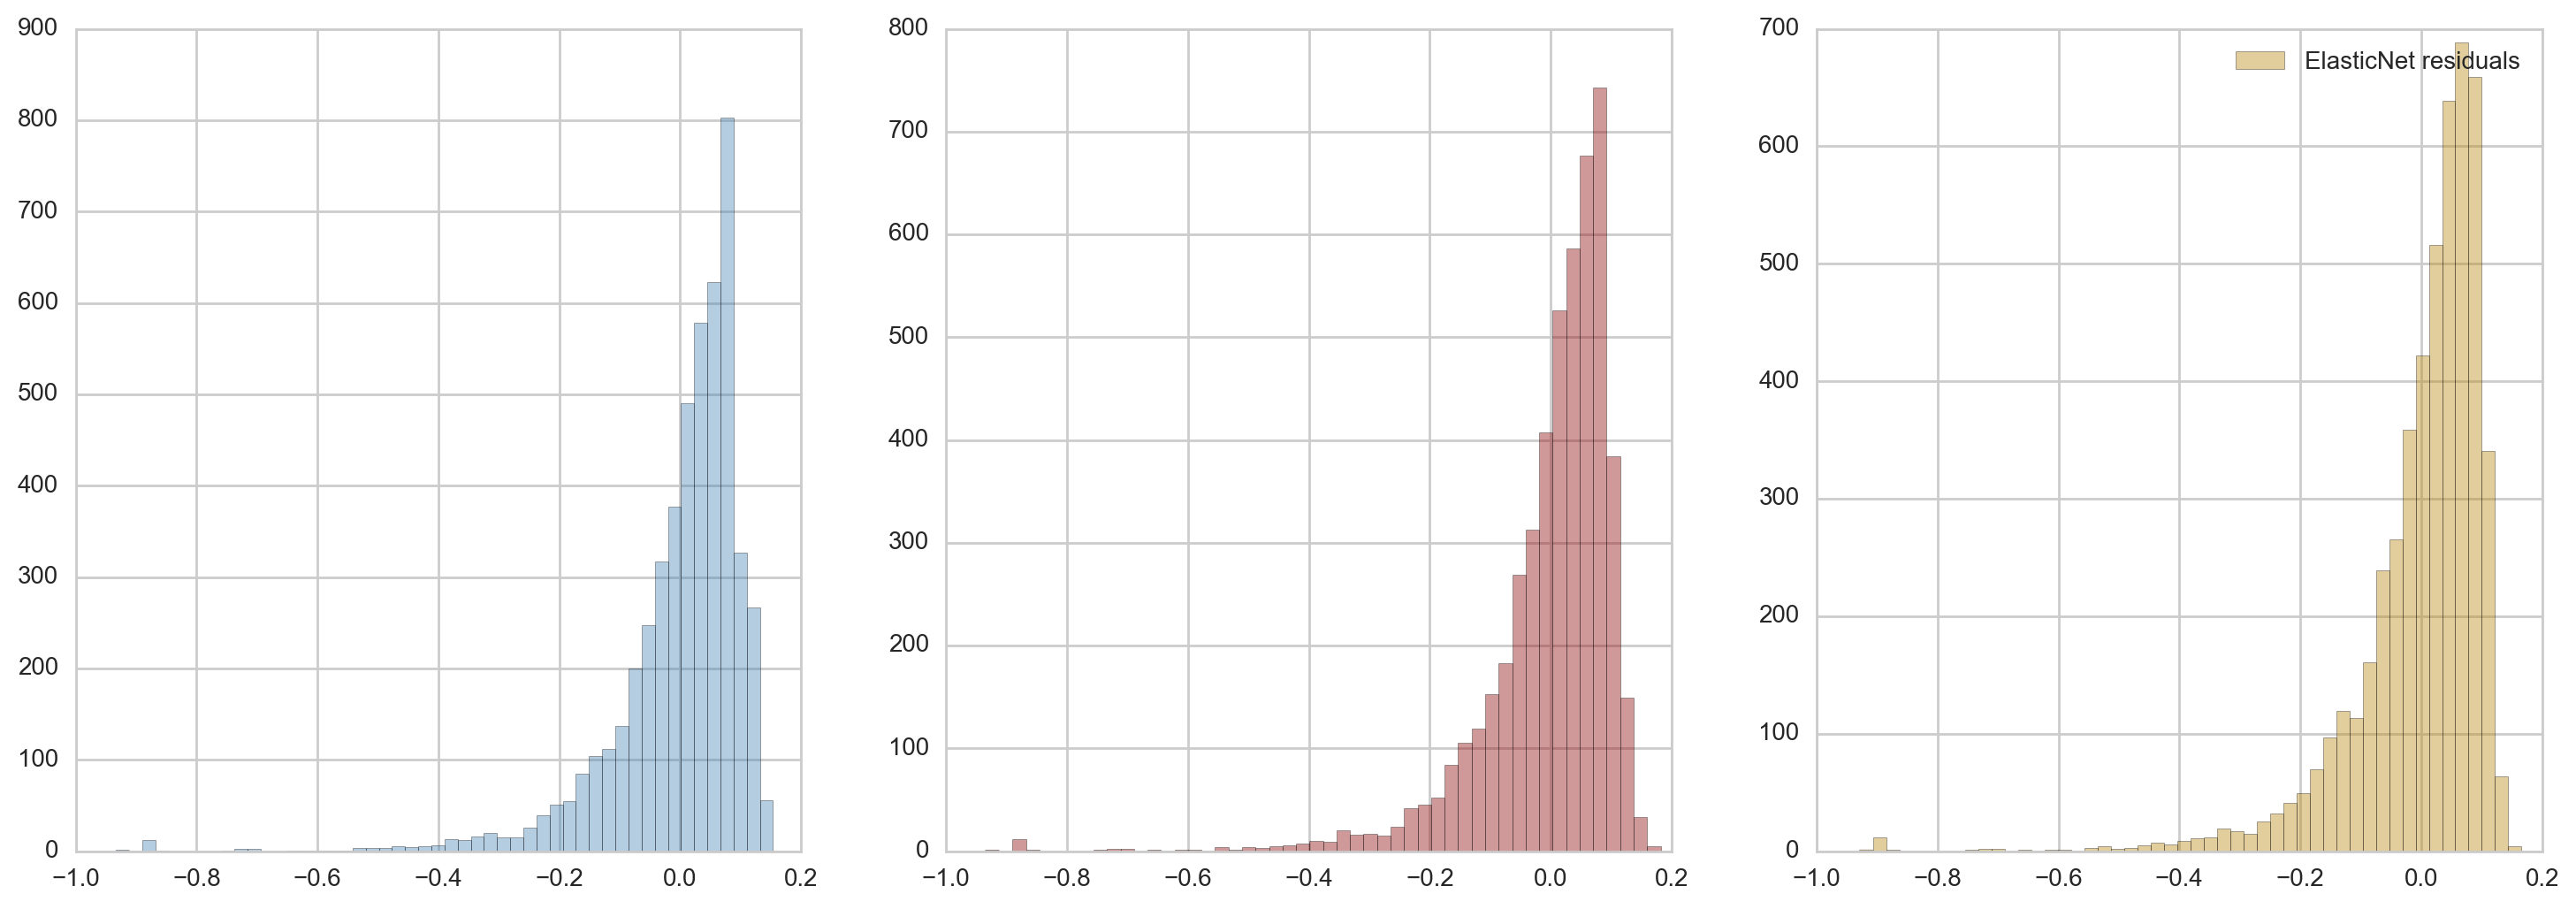

In [437]:
#Plot residuals from each model
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.legend()
plt.show();

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [191]:
park = pd.read_csv('~/Desktop/DSI-SF-5-Working/datasets/san_francisco/san_francisco/parks/park_scores.csv')

In [192]:
park.head(5)

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


In [193]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 5 columns):
ParkID    5495 non-null int64
PSA       5495 non-null object
Park      5495 non-null object
FQ        5495 non-null object
Score     5494 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 214.7+ KB


In [194]:
#check how many rows there are for each ParkID-FYQuarter combination
pd.crosstab([park.ParkID], park.FQ,  margins=True)

FQ,FY05Q3,FY05Q4,FY06Q1,FY06Q2,FY06Q3,FY06Q4,FY07Q1,FY07Q2,FY07Q3,FY07Q4,...,FY12Q4,FY13Q1,FY13Q2,FY13Q3,FY13Q4,FY14Q1,FY14Q2,FY14Q3,FY14Q4,All
ParkID,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,33
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,33
6,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,11
7,0,1,0,1,0,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,33
8,0,1,0,1,0,1,0,1,0,1,...,1,1,1,0,0,0,0,1,1,28
9,1,1,0,1,0,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,33
10,0,1,0,1,1,1,0,0,1,0,...,1,4,4,3,4,4,4,4,4,55
13,1,1,0,1,0,1,0,0,0,0,...,1,1,1,0,1,1,1,1,1,26


In [195]:
#since some parks have multiple scores for the same FQ, this code keeps only one score for each combination
#this will make Park-FQ the unit of analysis
park.drop_duplicates(['ParkID','FQ'], inplace=True)

In [196]:
pinfo = pd.read_csv('~/Desktop/DSI-SF-5-Working/datasets/san_francisco/san_francisco/parks/park_info.csv')

In [197]:
pinfo.head(5)

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN


In [198]:
pinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
ParkName           230 non-null object
ParkType           230 non-null object
ParkServiceArea    230 non-null object
PSAManager         230 non-null object
email              230 non-null object
Number             230 non-null object
Zipcode            223 non-null float64
Acreage            229 non-null float64
SupDist            227 non-null float64
ParkID             229 non-null float64
Location 1         202 non-null object
Lat                0 non-null float64
dtypes: float64(5), object(7)
memory usage: 21.6+ KB


In [199]:
pinfo.isnull().sum(axis=0)

ParkName             0
ParkType             0
ParkServiceArea      0
PSAManager           0
email                0
Number               0
Zipcode              7
Acreage              1
SupDist              3
ParkID               1
Location 1          28
Lat                230
dtype: int64

In [200]:
#drop Lat column as it only has missing values and Location 1 column as it is not useful for analysis
pinfo.drop(['Lat','Location 1'], axis=1, inplace=True)

In [201]:
#drop rows with missing values in remaining columns
pinfo.dropna(inplace=True)
pinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 1 to 229
Data columns (total 10 columns):
ParkName           221 non-null object
ParkType           221 non-null object
ParkServiceArea    221 non-null object
PSAManager         221 non-null object
email              221 non-null object
Number             221 non-null object
Zipcode            221 non-null float64
Acreage            221 non-null float64
SupDist            221 non-null float64
ParkID             221 non-null float64
dtypes: float64(4), object(6)
memory usage: 19.0+ KB


In [202]:
#convert ParkID column from float to integer
pinfo.ParkID = pinfo.ParkID.astype(int)

In [203]:
#combine park scores and park info datasets, keeping parkIDs existing in both datasets
park_all = pd.merge(park, pinfo, on='ParkID', how='inner')
park_all.head()

,ParkID,PSA,Park,FQ,Score,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795,CARL LARSEN PARK,Neighborhood Park or Playground,PSA 4,"Sheets, Robert",robert.sheets@sfgov.org,(415) 235-4576,94116.0,6.58,4.0
1,86,PSA4,Carl Larsen Park,FY06Q1,0.813,CARL LARSEN PARK,Neighborhood Park or Playground,PSA 4,"Sheets, Robert",robert.sheets@sfgov.org,(415) 235-4576,94116.0,6.58,4.0
2,86,PSA4,Carl Larsen Park,FY06Q2,0.256,CARL LARSEN PARK,Neighborhood Park or Playground,PSA 4,"Sheets, Robert",robert.sheets@sfgov.org,(415) 235-4576,94116.0,6.58,4.0
3,86,PSA4,Carl Larsen Park,FY06Q4,0.648,CARL LARSEN PARK,Neighborhood Park or Playground,PSA 4,"Sheets, Robert",robert.sheets@sfgov.org,(415) 235-4576,94116.0,6.58,4.0
4,86,PSA4,Carl Larsen Park,FY07Q2,0.716,CARL LARSEN PARK,Neighborhood Park or Playground,PSA 4,"Sheets, Robert",robert.sheets@sfgov.org,(415) 235-4576,94116.0,6.58,4.0


In [204]:
#check how many missing values remain
park_all.isnull().sum(axis=0)

ParkID             0
PSA                0
Park               0
FQ                 0
Score              1
ParkName           0
ParkType           0
ParkServiceArea    0
PSAManager         0
email              0
Number             0
Zipcode            0
Acreage            0
SupDist            0
dtype: int64

In [205]:
#drop rows that still have missing values
park_all.dropna(inplace=True)

In [206]:
#convert float zip code values into integers
park_all.Zipcode = park_all.Zipcode.astype(int)

In [207]:
park_all.Zipcode.value_counts()

94110    631
94124    328
94132    327
94102    302
94109    280
94114    280
94112    269
94115    263
94131    262
94118    241
94121    241
94133    226
94134    196
94117    180
94108    178
94116    172
94107    154
94123    151
94127    150
94111     88
94103     62
94122     57
Name: Zipcode, dtype: int64

In [221]:
#convert multicategorical zipcode column into dummies
park_all = pd.get_dummies(park_all, columns=['Zipcode'])

In [208]:
park_all.ParkType.value_counts()

Neighborhood Park or Playground    3283
Mini Park                          1112
Civic Plaza or Square               313
Regional Park                       270
Parkway                              60
Name: ParkType, dtype: int64

In [209]:
park_all['ParkType'].replace(['Neighborhood Park or Playground','Mini Park','Civic Plaza or Square',
                         'Regional Park','Parkway'],['NP','MP','CP','RP','PW'],inplace=True)

In [212]:
#convert multicategorical park type column into dummies
park_all = pd.get_dummies(park_all, columns=['ParkType'])

In [214]:
park_all.SupDist.value_counts()

10.0    707
8.0     669
3.0     650
9.0     509
5.0     450
1.0     381
6.0     371
11.0    363
2.0     361
7.0     314
4.0     263
Name: SupDist, dtype: int64

In [219]:
#convert multicategorical SupDist column into dummies
park_all = pd.get_dummies(park_all, columns=['SupDist'])

In [215]:
park_all.ParkServiceArea.value_counts()

PSA 1               1341
PSA 2                971
PSA 3                705
PSA 5                693
PSA 4                643
PSA 6                634
Golden Gate Park      51
Name: ParkServiceArea, dtype: int64

In [216]:
park_all.PSA.value_counts()

PSA1    1341
PSA2     971
PSA3     705
PSA5     693
PSA4     673
PSA6     634
GGP       21
Name: PSA, dtype: int64

In [222]:
#convert multicategorical PSA column into dummies
park_all = pd.get_dummies(park_all, columns=['PSA'])

In [217]:
#drop unnecessary columns, including ParkSserviceArea, which overlaps with PSA column (though not entirely)
park_all.drop(['ParkServiceArea','Park','ParkName','email','PSAManager','Number'], axis=1, inplace=True)

In [223]:
park_all.head()

,ParkID,FQ,Score,Acreage,ParkType_CP,ParkType_MP,ParkType_NP,ParkType_PW,ParkType_RP,SupDist_1.0,...,Zipcode_94132,Zipcode_94133,Zipcode_94134,PSA_GGP,PSA_PSA1,PSA_PSA2,PSA_PSA3,PSA_PSA4,PSA_PSA5,PSA_PSA6
0,86,FY05Q3,0.795,6.58,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,86,FY06Q1,0.813,6.58,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,86,FY06Q2,0.256,6.58,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,86,FY06Q4,0.648,6.58,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,86,FY07Q2,0.716,6.58,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [226]:
park_all.shape

(5038, 49)

In [224]:
park_all.columns

Index([u'ParkID', u'FQ', u'Score', u'Acreage', u'ParkType_CP', u'ParkType_MP',
       u'ParkType_NP', u'ParkType_PW', u'ParkType_RP', u'SupDist_1.0',
       u'SupDist_2.0', u'SupDist_3.0', u'SupDist_4.0', u'SupDist_5.0',
       u'SupDist_6.0', u'SupDist_7.0', u'SupDist_8.0', u'SupDist_9.0',
       u'SupDist_10.0', u'SupDist_11.0', u'Zipcode_94102', u'Zipcode_94103',
       u'Zipcode_94107', u'Zipcode_94108', u'Zipcode_94109', u'Zipcode_94110',
       u'Zipcode_94111', u'Zipcode_94112', u'Zipcode_94114', u'Zipcode_94115',
       u'Zipcode_94116', u'Zipcode_94117', u'Zipcode_94118', u'Zipcode_94121',
       u'Zipcode_94122', u'Zipcode_94123', u'Zipcode_94124', u'Zipcode_94127',
       u'Zipcode_94131', u'Zipcode_94132', u'Zipcode_94133', u'Zipcode_94134',
       u'PSA_GGP', u'PSA_PSA1', u'PSA_PSA2', u'PSA_PSA3', u'PSA_PSA4',
       u'PSA_PSA5', u'PSA_PSA6'],
      dtype='object')

In [353]:
#Construct and compare different regression models with cross-validation
#Construct and evaluate different models with cross-validated  R2R2 .
#Compare LinearRegression, Lasso, Ridge, and ElasticNet.
#Report on which model is best after performing regularization,
#and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
#Plot visuals that compare the performance of the four models.

In [335]:
#Linear Regression with Cross-Validation
linreg = LinearRegression()

x_cols = park_all.drop(['Score','ParkID','FQ'], axis=1)

Y = park_all.Score.values
X = x_cols.values

linreg_scores = cross_val_score(linreg, X, Y, cv=10, scoring='r2')

print linreg_scores
print np.mean(linreg_scores)

[-0.24078672 -0.02259013  0.02685322  0.03719303  0.0202275  -0.07322404
  0.03100808 -0.04334933 -0.07995581 -0.00778595]
-0.0352410153654


In [336]:
#Normalize the predictors for regularization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [341]:
#Find an optimal value for Ridge regression alpha using RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10, scoring='r2')
optimal_ridge.fit(Xn, Y)

print optimal_ridge.alpha_

4659.52566866


In [342]:
#Cross-validate the Ridge R2 with the optimal alpha.
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xn, Y, cv=10, scoring='r2')

print ridge_scores
print np.mean(ridge_scores)

[ 0.00661802  0.0096247   0.0389448   0.04581828  0.05882156  0.01275952
  0.04938     0.00644787  0.01294363  0.02322776]
0.0264586143183


In [340]:
#Find an optimal value for Lasso regression alpha using LassoCV
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, Y)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00243597058229


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished


In [343]:
#Cross-validate the Lasso R2 with the optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, Y, cv=10, scoring='r2')

print lasso_scores
print np.mean(lasso_scores)

[-0.0019606   0.00686127  0.00370816  0.05601335  0.05434553  0.00022138
  0.05006048 -0.00175145 -0.01312826  0.02786423]
0.0182234107148


In [344]:
#Find an optimal value for Elastic Net regression alpha using ElasticNetCV
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xn, Y)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.276544804563
0.01


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   36.0s finished


In [346]:
#Cross-validate the ElasticNet R2 with the optimal alpha and l1_ratio
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xn, Y, cv=10, scoring='r2')

print enet_scores
print np.mean(enet_scores)

[ 0.00470832  0.01363259  0.00440975  0.05375517  0.05324449  0.00372999
  0.04780959  0.00196908  0.00477936  0.02638706]
0.021442539746


The Ridge regression model is performing best out of the four, as it's R-squared is slightly better than others'.  It seems to handle the multicollinearity better in the model.

In [347]:
ridge.fit(Xn, Y)
enet.fit(Xn, Y)
lasso.fit(Xn, Y)

Lasso(alpha=0.0024359705822921945, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [348]:
ridge_resid = Y - ridge.predict(Xn)
lasso_resid = Y - lasso.predict(Xn)
enet_resid = Y - enet.predict(Xn)

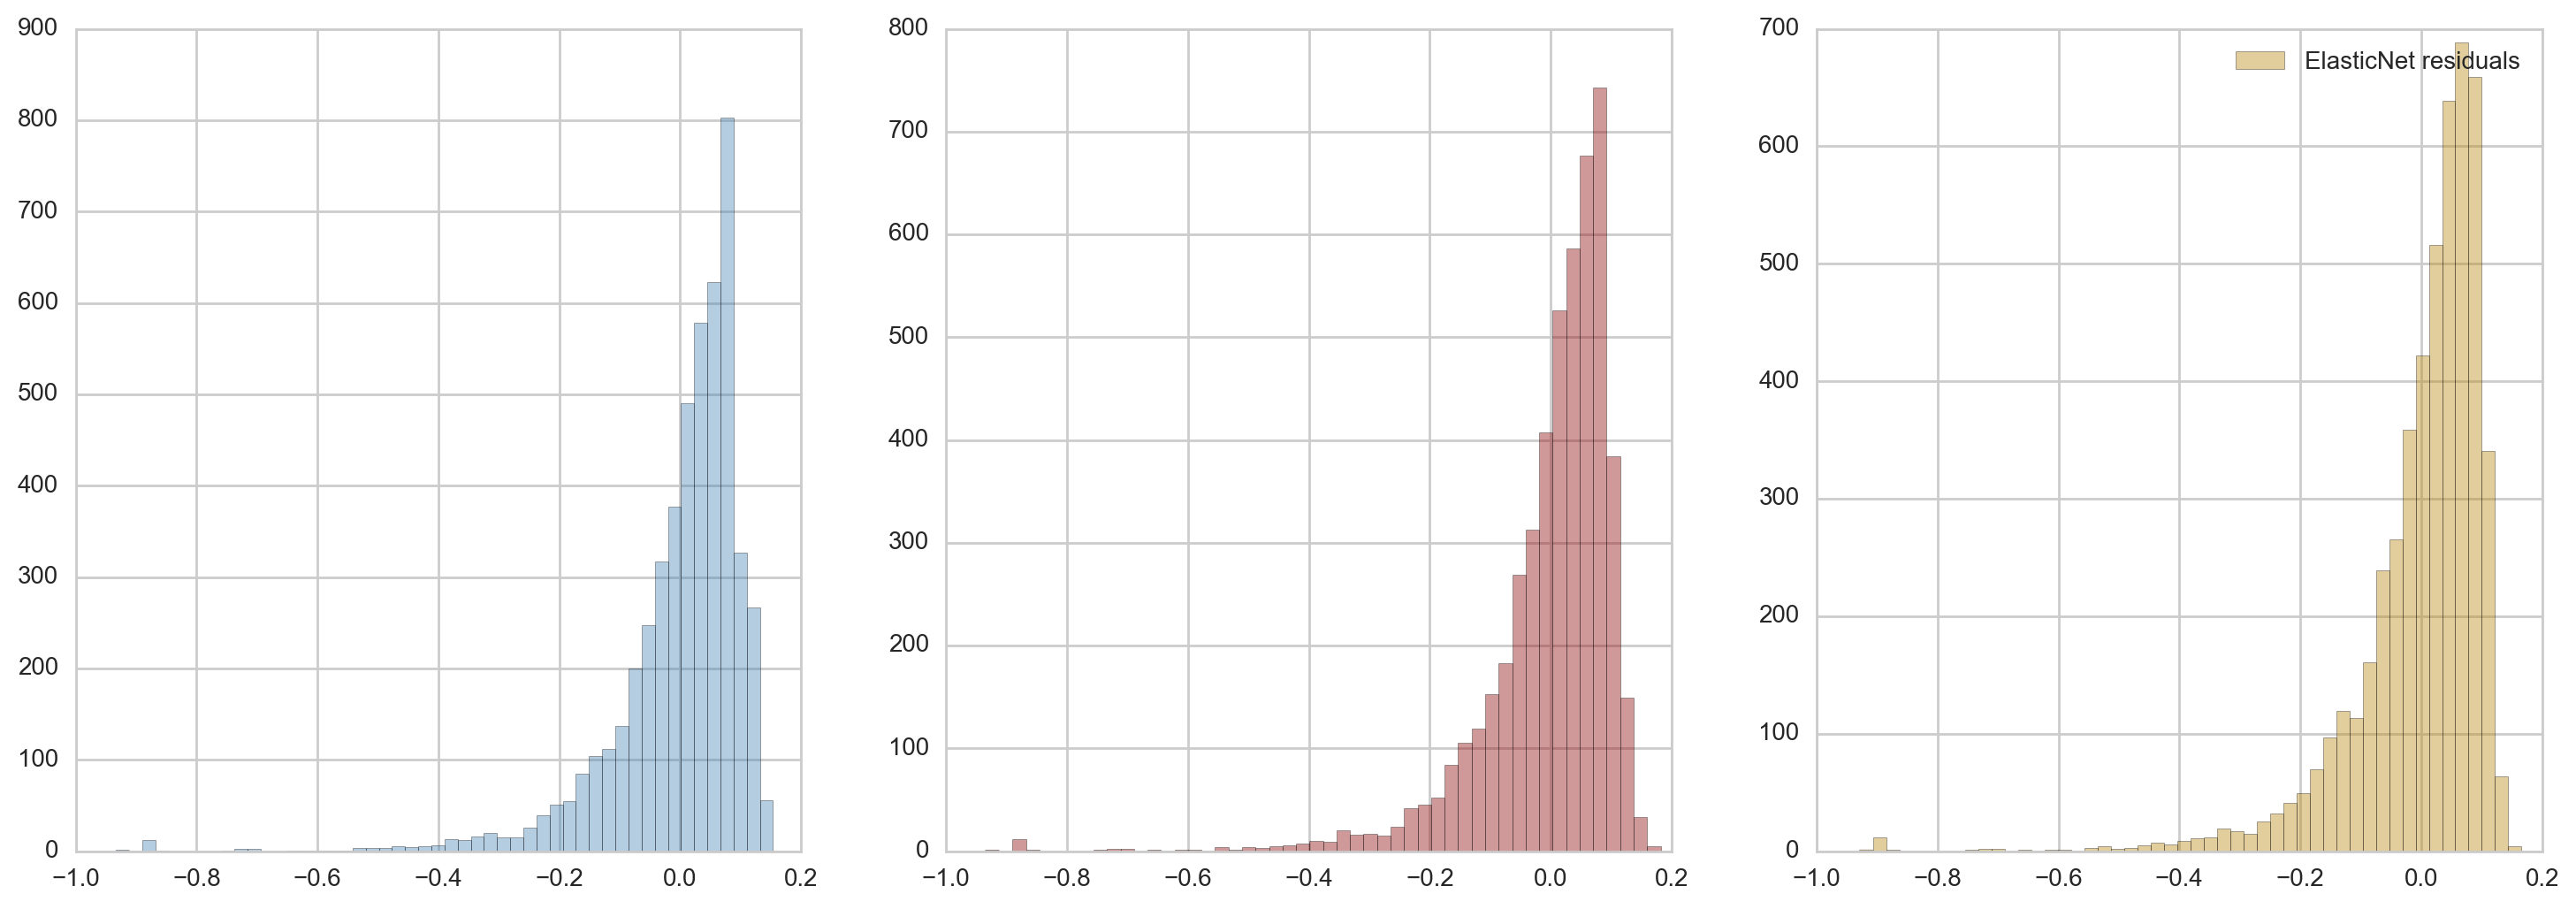

In [352]:
#Plot residuals from each model
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(lasso_resid, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Lasso residuals')

sns.distplot(enet_resid, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='ElasticNet residuals')

plt.legend()
plt.show();

Residuals from the Ridge regression appear to lie closer to 0 than in the other models.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


ANSWER:

1) Characteristics of user population will be biased toward people similar to existing users.  Also, it is likely that many of those who sign up will not use the app, so the user population will be diluted with those who are not going to be regular customers.  And those who are given these offers may be disincentivized to continue to place actual orders on the app.

2) I would measure the success of this program by percentage of those who were referred to the app who became customers (preferably regulars) and by cost-benefit ratio (free orders given away versus new customers brought in).

3) What is your opinion on the need for stricter laws on dangerous weapons?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [13]:
chol = pd.read_csv('http://assets.datacamp.com/blog_assets/chol.txt', sep=" ")

In [14]:
chol.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,b,alive
1,53,167,56,250,sigare,o,dead
2,44,170,80,304,sigare,a,dead
3,37,173,89,178,nonsmo,o,alive
4,26,170,71,206,sigare,o,alive


In [15]:
chol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
AGE       200 non-null int64
HEIGHT    200 non-null int64
WEIGHT    200 non-null int64
CHOL      200 non-null int64
SMOKE     200 non-null object
BLOOD     200 non-null object
MORT      200 non-null object
dtypes: int64(4), object(3)
memory usage: 11.0+ KB


In [77]:
chol.MORT.value_counts()

alive    176
dead      24
Name: MORT, dtype: int64

In [79]:
#convert string mortality status values to integers
chol.MORT = chol.MORT.apply(lambda x: 1 if x == 'alive' else 0)

In [17]:
chol.SMOKE.value_counts()

sigare    109
nonsmo     49
pipe       42
Name: SMOKE, dtype: int64

In [82]:
#convert string smoking values to integers, combining 'sigare' and 'pipe' categories into one
chol.SMOKE = chol.SMOKE.apply(lambda x: 1 if ((x == 'sigare') | (x == 'pipe')) else 0)

In [83]:
chol.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,200.0,35.715,9.604426,18.0,28.75,37.0,42.0,58.0
HEIGHT,200.0,172.350,6.773990,156.0,168.00,172.0,176.0,191.0
WEIGHT,200.0,75.885,10.442076,53.0,68.75,75.0,82.0,110.0
CHOL,200.0,233.600,44.766732,107.0,204.00,232.0,259.0,455.0
SMOKE,200.0,0.755,0.431166,0.0,1.00,1.0,1.0,1.0
MORT,200.0,0.880,0.325777,0.0,1.00,1.0,1.0,1.0


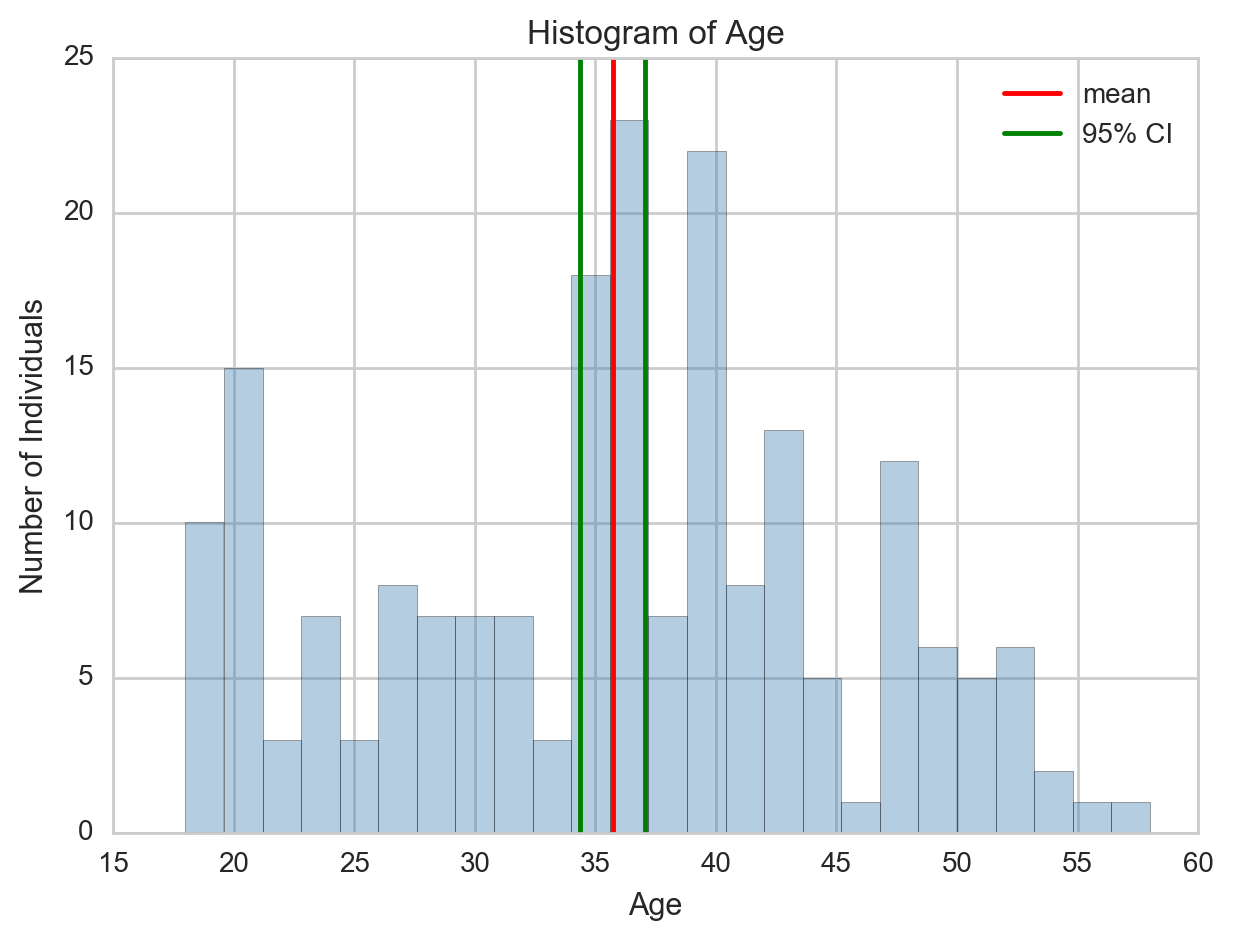

In [55]:
#plot histogram of AGE with vertical lines for sample mean and confidence interval for population mean
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.distplot(chol.AGE, bins=25, color='steelblue', kde=False)
stderr = stats.sem(chol.AGE)
ax.vlines(x = chol.AGE.mean(), ymin=0, ymax=25, color='red', label='mean')
ax.vlines(x = chol.AGE.mean() - stderr * 1.96, ymin=0, ymax=25, color='green', label='95% CI' )
ax.vlines(x = chol.AGE.mean() + stderr * 1.96, ymin=0, ymax=25, color='green' )

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
ax.legend()
plt.show()

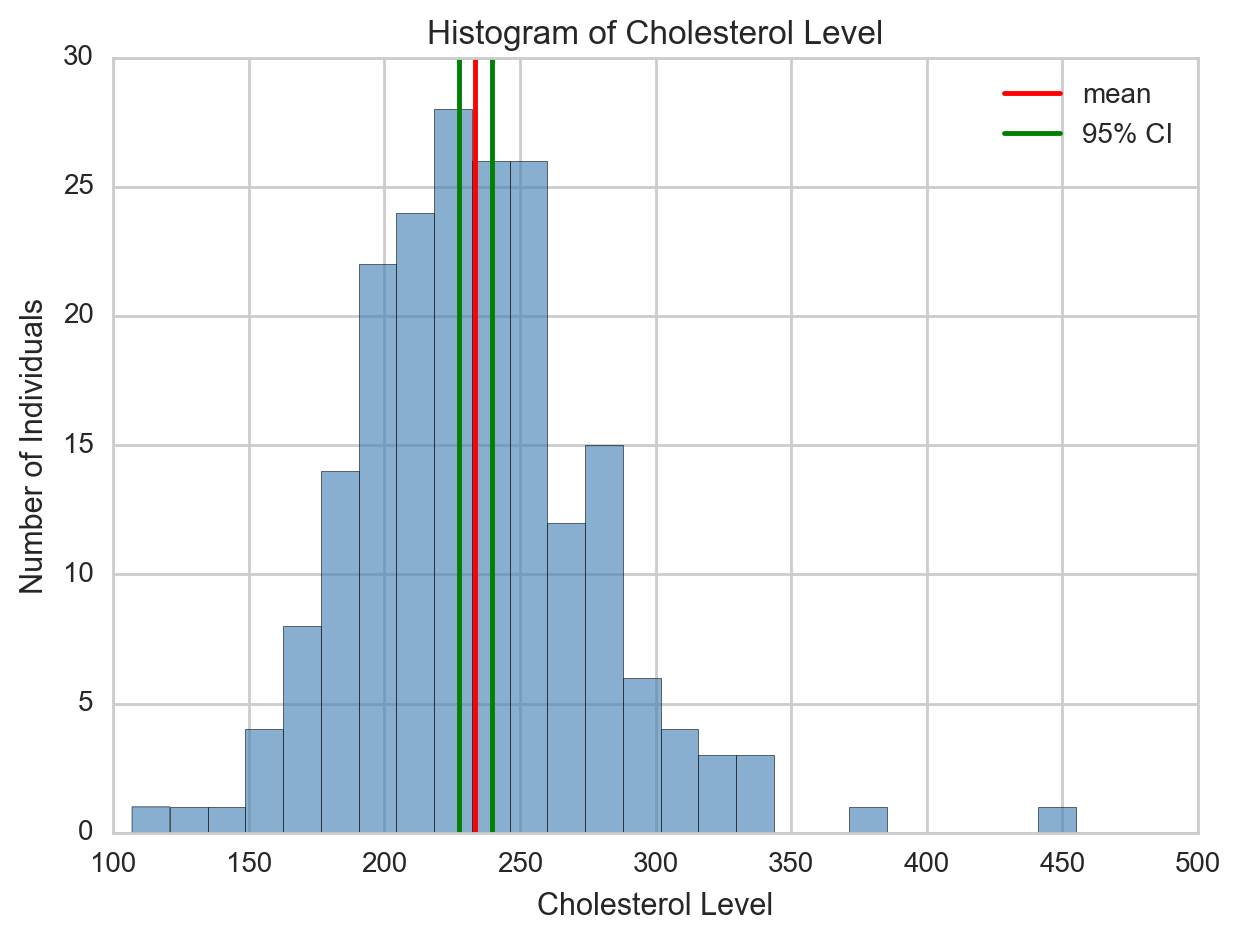

In [57]:
#plot histogram of CHOL with vertical lines for sample mean and confidence interval for population mean
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.distplot(chol.CHOL, bins=25, color='steelblue', kde=False)
stderr = stats.sem(chol.CHOL)
ax.vlines(x = chol.CHOL.mean(), ymin=0, ymax=30, color='red', label='mean')
ax.vlines(x = chol.CHOL.mean() - stderr * 1.96, ymin=0, ymax=30, color='green', label='95% CI' )
ax.vlines(x = chol.CHOL.mean() + stderr * 1.96, ymin=0, ymax=30, color='green' )

sns.distplot(chol.CHOL, bins=25, color='steelblue', kde=False)

plt.title('Histogram of Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of Individuals')
ax.legend()
plt.show()

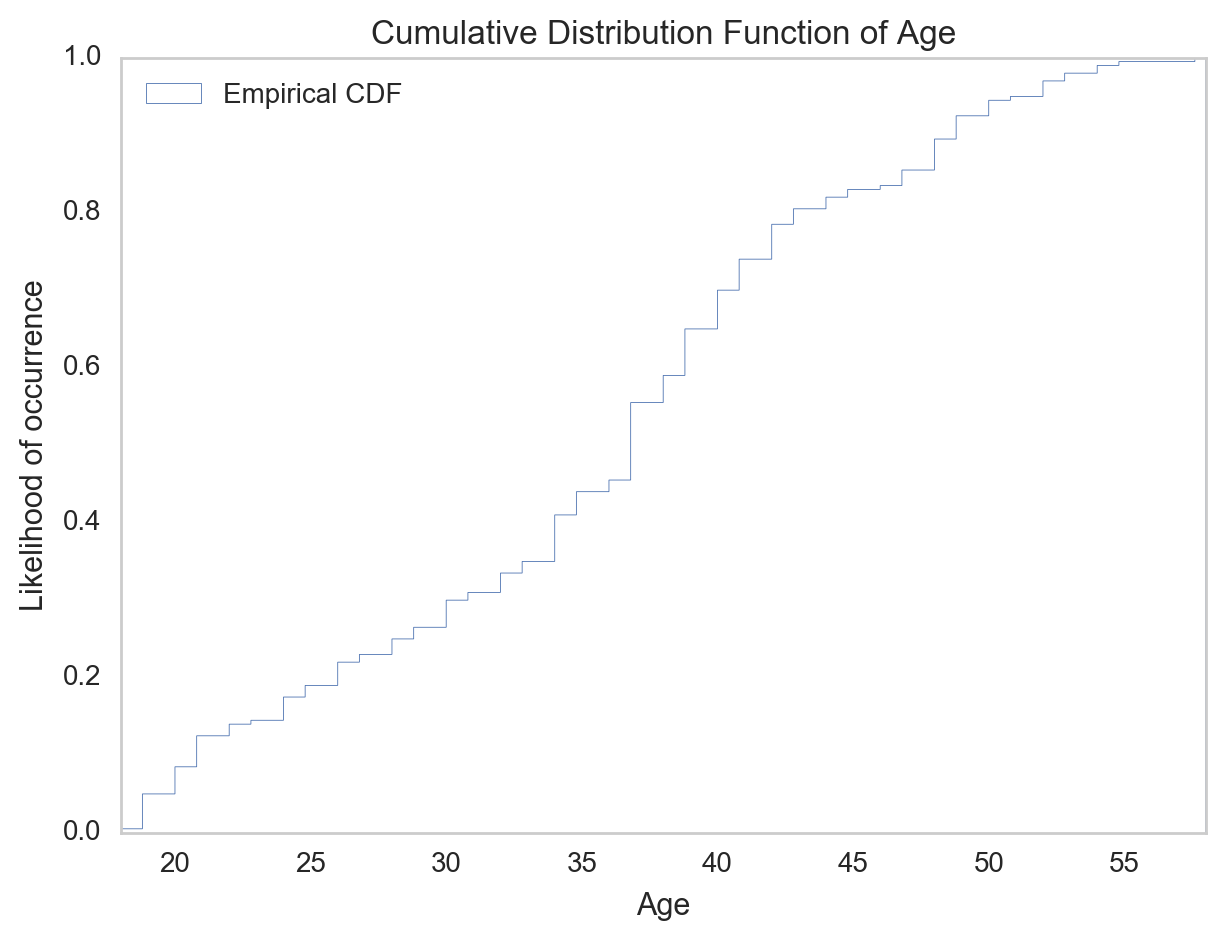

In [72]:
n_bins = 100

fig, ax = plt.subplots(figsize=(7, 5))

# plot the cumulative histogram
ax.hist(chol.AGE, n_bins, normed=1, histtype='step', cumulative=True, label='Empirical CDF')

ax.grid(b=False)
ax.legend(loc='upper left')
ax.set_title('Cumulative Distribution Function of Age')
ax.set_xlabel('Age')
ax.set_ylabel('Likelihood of occurrence')
ax.set_ylim([0,1])
ax.set_xlim([chol.AGE.min(), chol.AGE.max()])

plt.show()

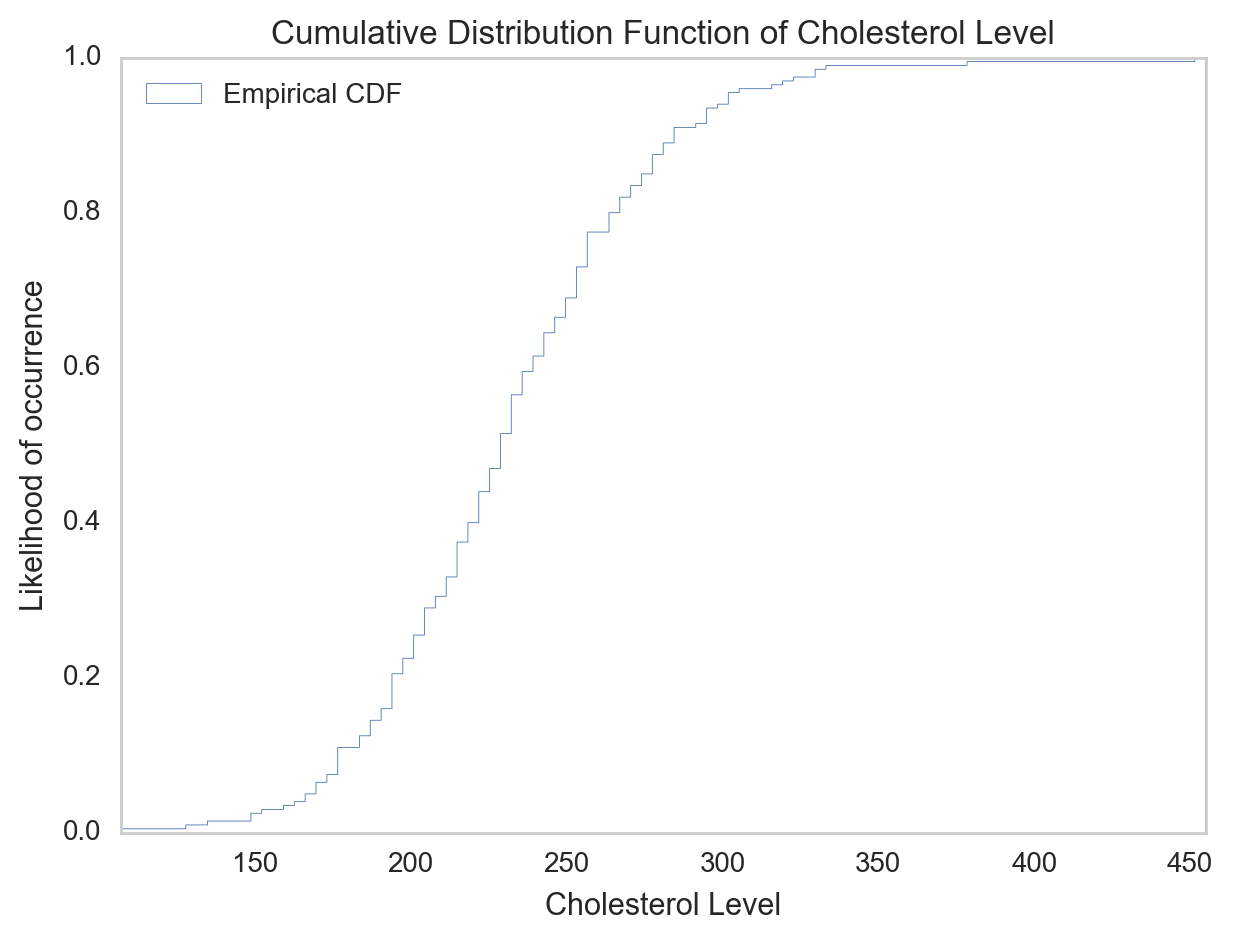

In [73]:
n_bins = 100

fig, ax = plt.subplots(figsize=(7, 5))

# plot the cumulative histogram
ax.hist(chol.CHOL, n_bins, normed=1, histtype='step', cumulative=True, label='Empirical CDF')

ax.grid(b=False)
ax.legend(loc='upper left')
ax.set_title('Cumulative Distribution Function of Cholesterol Level')
ax.set_xlabel('Cholesterol Level')
ax.set_ylabel('Likelihood of occurrence')
ax.set_ylim([0,1])
ax.set_xlim([chol.CHOL.min(), chol.CHOL.max()])

plt.show()

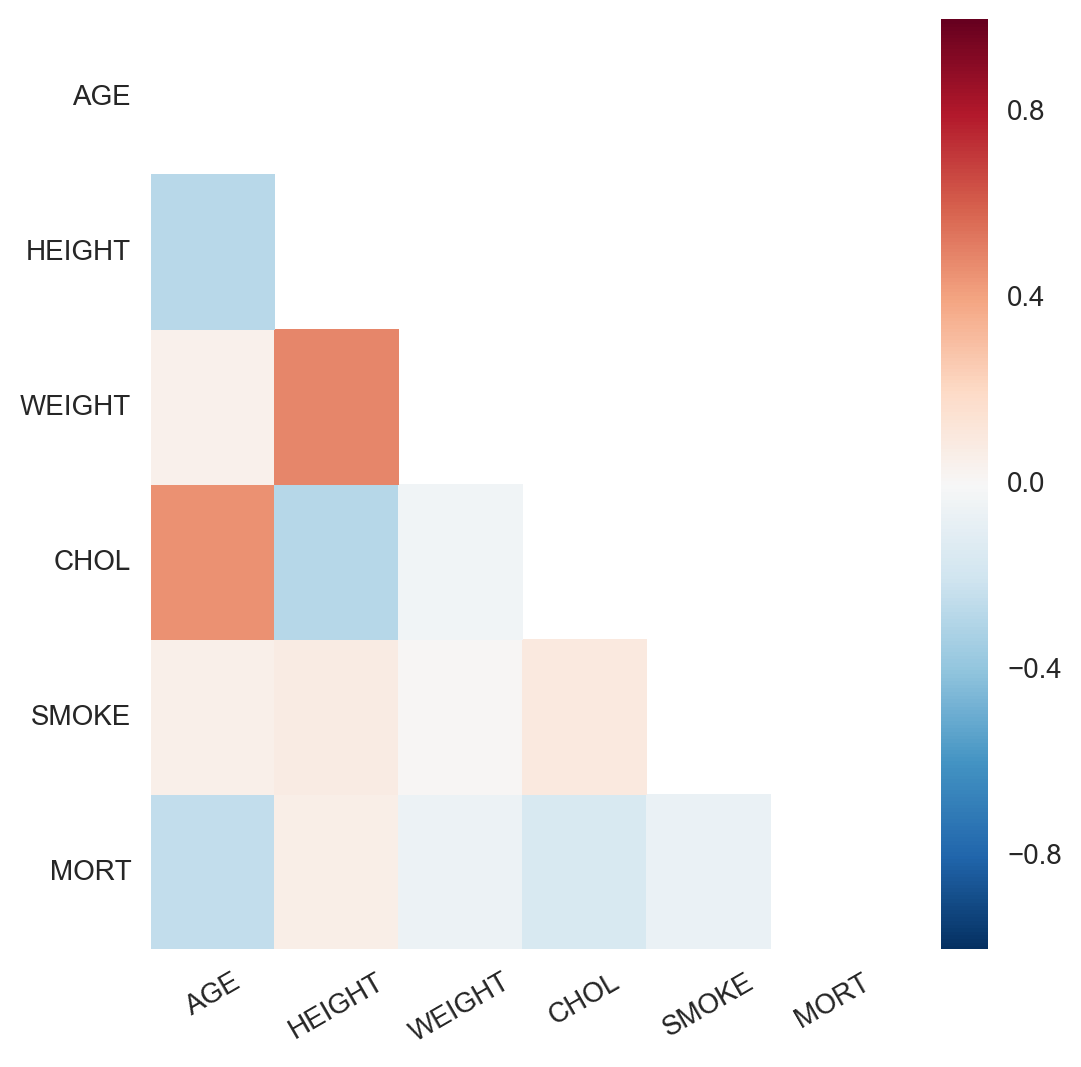

In [84]:
corrs = chol.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(6,6))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [103]:
#THIS T-TEST SHOWS THAT THERE IS NOT A STATISTICALLY SIGNIFICANT DIFFERENCE IN MORTALITY BETWEEN SMOKERS AND NON-SMOKERS

smokers = chol[chol.SMOKE == 1].MORT.values
nonsmokers = chol[chol.SMOKE == 0].MORT.values

ttest_output = stats.ttest_ind(smokers, nonsmokers, equal_var=False)

print "The t-statistic is %.3f and the p-value is %.3f." % ttest_output

The t-statistic is -1.053 and the p-value is 0.295.


In [105]:
#THIS T-TEST SHOWS THAT THE SAMPLE AVERAGE WEIGHT IS SIGNIFICANTLY DIFFERENT FROM THE NATIONAL AVERAGE

sample_weight = chol.WEIGHT.values
pop_weight_avg = 85

one_sample = stats.ttest_1samp(sample_weight, pop_weight_avg)

print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The t-statistic is -12.345 and the p-value is 0.000.


In [106]:
# If national average weight is 85 pounds, is our weight average statistical significantly less?

Dividing the 0.000 p-value in half and with the negative t-statistic (-12.345) we can see that the sample weight average is significantly less than the national average.